In [29]:
import pandas as pd

In [30]:
df= pd.read_excel('4.1.1.xlsx', sheet_name='Goal4')
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,BasePeriod,Source,GeoInfoUrl,FootNote,Education level,Nature,Reporting Type,Sex,Type of skill,Units
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,48.97526,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,N,G,BOTHSEX,SKILL_MATH,PERCENT
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,62.31563,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_READ,PERCENT
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,61.21205,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,N,G,BOTHSEX,SKILL_READ,PERCENT
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,47.31352,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_MATH,PERCENT
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2001,47.49661,2001,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_MATH,PERCENT


In [31]:
df= df.drop(['Goal', 'Target', 'Nature', 'Reporting Type', 'Indicator', 'SeriesCode', 'GeoAreaCode', 'SeriesDescription', 'Source', 'Units', 'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'GeoInfoUrl', 'FootNote', 'Time_Detail'], axis=1)
df.head()


,GeoAreaName,TimePeriod,Value,Education level,Sex,Type of skill
0,World,2000,48.97526,PRIMAR,BOTHSEX,SKILL_MATH
1,World,2000,62.31563,LOWSEC,BOTHSEX,SKILL_READ
2,World,2000,61.21205,PRIMAR,BOTHSEX,SKILL_READ
3,World,2000,47.31352,LOWSEC,BOTHSEX,SKILL_MATH
4,World,2001,47.49661,LOWSEC,BOTHSEX,SKILL_MATH


In [32]:
df.nunique()

GeoAreaName         143
TimePeriod           23
Value              5182
Education level       3
Sex                   3
Type of skill         2
dtype: int64

In [33]:
df.isnull().sum()

GeoAreaName        0
TimePeriod         0
Value              0
Education level    0
Sex                0
Type of skill      0
dtype: int64

In [34]:
df_indo = df.loc[df['GeoAreaName'] == 'Malaysia']
df_indo.head()

,GeoAreaName,TimePeriod,Value,Education level,Sex,Type of skill
3183,Malaysia,2009,56.03299,LOWSEC,BOTHSEX,SKILL_READ
3184,Malaysia,2009,40.67198,LOWSEC,BOTHSEX,SKILL_MATH
3185,Malaysia,2012,48.24566,LOWSEC,BOTHSEX,SKILL_MATH
3186,Malaysia,2012,47.27839,LOWSEC,BOTHSEX,SKILL_READ
3187,Malaysia,2015,62.75743,LOWSEC,BOTHSEX,SKILL_READ


In [35]:
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 3183 to 3205
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GeoAreaName      23 non-null     object 
 1   TimePeriod       23 non-null     int64  
 2   Value            23 non-null     float64
 3   Education level  23 non-null     object 
 4   Sex              23 non-null     object 
 5   Type of skill    23 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ KB


In [36]:
df_indo['Education level'].unique()

array(['LOWSEC', 'PRIMAR'], dtype=object)

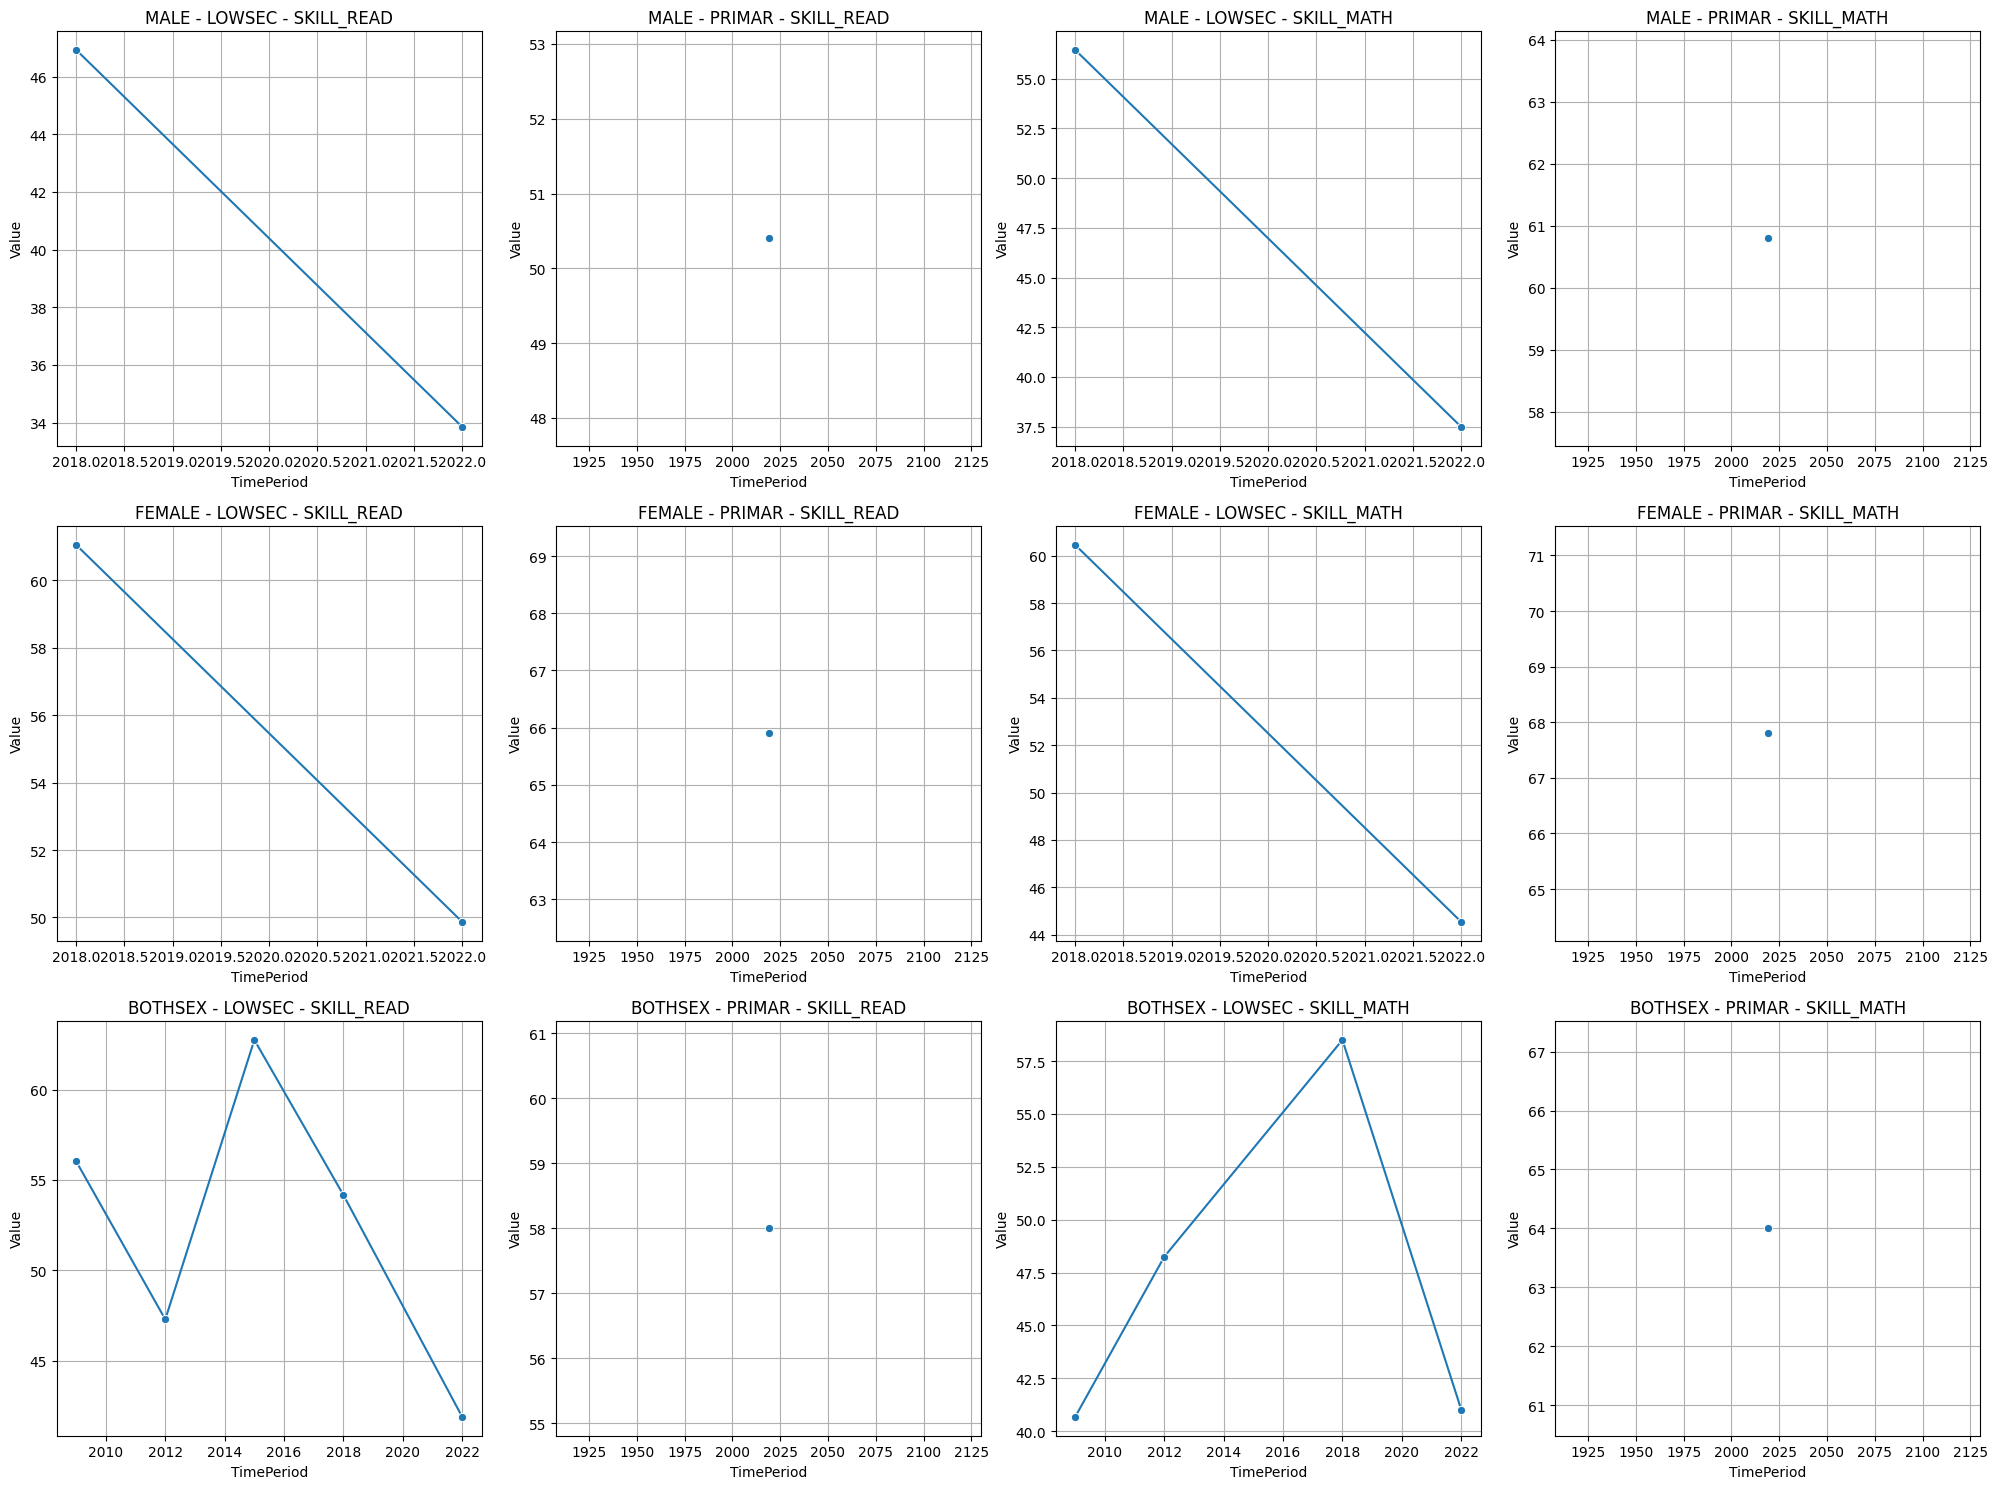

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

genders = ['MALE', 'FEMALE', 'BOTHSEX']
skills = ['SKILL_READ', 'SKILL_MATH']
educations = ['LOWSEC', 'PRIMAR']

# Tentukan jumlah baris dan kolom untuk subplots
nrows = len(genders)
ncols = len(skills) * len(educations)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Iterasi melalui tiap gender, skill, dan education level
for i, gender in enumerate(genders):
    for j, skill in enumerate(skills):
        for k, education in enumerate(educations):
            # Filter data untuk masing-masing gender, skill, dan education level
            data_filtered = df_indo[
                (df_indo['Sex'] == gender) &
                (df_indo['Type of skill'] == skill) &
                (df_indo['Education level'] == education)
            ]
            
            # Menentukan posisi subplot
            col_index = j * len(educations) + k
            
            # Plotkan line graph untuk masing-masing gender, skill, dan education level
            sns.lineplot(data=data_filtered, x='TimePeriod', y='Value', ax=ax[i, col_index], marker='o', errorbar=None)
            
            # Set title dan label
            ax[i, col_index].set_title(f'{gender} - {education} - {skill}')
            ax[i, col_index].set_xlabel('TimePeriod')
            ax[i, col_index].set_ylabel('Value')
            ax[i, col_index].grid(True)

# Menyempurnakan layout agar tidak overlap
plt.tight_layout()

# Menampilkan plot
plt.show()


## Penjelasan
Value dalam dataset tersebut (indikator 4.1.1) merepresentasikan proporsi masyarakat yang berada pada jenjang pendidikan tertenu (Education Level) yang mahir dalam membaca dan menghitung berdasarkan jenis kelaminnya. 

Sebagai contoh:
- Jika value adalah 55.5 untuk kategori "Male - Lowsec - Skill_Read" , ini berarti sekitar 55.5% dari laki-laki berusia yang berpendidikan lower secondary (pendidikan wajib bagi usia 12-16 tahun) di Indonesia mahir dalam membaca.
- Jika value adalah 70 untuk kategori "Female - Lowsec - Skill_Math" , ini berarti sekitar 70% dari perempuan berusia yang berpendidikan lower secondary (pendidikan wajib bagi usia 12-16 tahun) di Indonesia mahir dalam berhitung sederhana.